<a href="https://colab.research.google.com/github/arthurt1/Avalia-o-de-Modelos-de-ML/blob/ryan/Avalia%C3%A7%C3%A3o_de_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nomes da Equipe:



*   Arthur Thomé Costa - 565756
*   Rodrigo Sousa Barbosa - 566581
*   Ryan dos Santos Oliveira - 565120




# Objetivos:
*   Aplicar diferentes métricas de avaliação para classificação, regressão e clusterização
*  Comparar o desempenho de múltiplos algoritmos
* Interpretar corretamente os resultados das métricas
* Identificar problemas como overfitting e underfitting

# Pequeno resumo do trabalho e resultados:

Preparação do Ambiente Virtual:

In [3]:
## Importação das bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import load_iris, load_wine, fetch_openml
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Parte 1: CLASSIFICAÇÃO


---


Dataset: *Iris Dataset*

Descrição: Classificação de espécies de flores Iris (Setosa, Versicolor, Virginica) baseado em medidas das sépalas e pétalas.

## Tarefa 1.1: Implementação e Avaliação Básica

Implemente o classificador K-Nearest Neighbors (KNN) com k=3 e k=5

### a) Divida o dataset em 70% treino e 30% teste. Para cada modelo, calcule:

- Acurácia
- Precisão (macro e micro)
- Recall (macro e micro)
- F1-score (macro e micro)
- Matriz de confusão

### b) Qual modelo obteve melhor desempenho geral? Justifique sua resposta considerando múltiplas métricas.

In [ ]:
nao sei

### C) Existe alguma classe que é mais difícil de classificar? Como você identificou isso?

## Tarefa 1.2: Validação Cruzada

### a)Implemente validação cruzada k-fold com k=5 para todos os modelos da Tarefa 1.1.

### b)Compare os resultados da validação cruzada com a divisão simples treino/teste. O que você observa?

### c) Calcule o desvio padrão da acurácia para cada modelo. O que isso indica sobre a estabilidade do modelo?

## Tarefa 1.3: Curvas ROC e AUC

### a) Para o problema binário (Setosa vs. Não-Setosa), plote as curvas ROC para os três modelos.

### b) Calcule a área sob a curva (AUC) para cada modelo.

### c) Interprete os resultados: qual modelo tem melhor capacidade de discriminação?

# Parte 2: REGRESSÃO

---

Dataset: *Boston Housing (ou California Housing)*

Descrição: Predição de preços de imóveis baseado em características socioeconômicas e geográficas.

## Tarefa 2.1: Múltiplos Modelos de Regressão

Implemente o modelo. K-Nearest Neighbors Regressor (k=3 e k=7)

### a) Divida o dataset em 70% treino e 30% teste. Para cada modelo, calcule:

- Erro Médio Absoluto (MAE)
- Erro Quadrático Médio (MSE)
- Raiz do Erro Quadrático Médio (RMSE)
- Coeficiente de Determinação (R²)
- Erro Percentual Absoluto Médio (MAPE)

### b) Crie um gráfico de dispersão comparando valores preditos vs. valores reais para cada modelo.

### c) Qual modelo apresentou melhor desempenho? Por quê?

## Tarefa 2.2: Análise de Resíduos

### a) Para os três melhores modelos, plote o gráfico de resíduos (erro vs. valores preditos).

### b) Há algum padrão nos resíduos? O que isso indica sobre o modelo?

### c) Calcule e plote o histograma dos resíduos. Eles seguem uma distribuição aproximadamente normal?

# Parte 3: CLUSTERIZAÇÃO


---


Dataset: *Wine Dataset*

Descrição: Análise química de vinhos de três cultivares diferentes na Itália.

## Tarefa 3.1: K-Means

In [6]:
print("--- Verificação de Qualidade dos Dados ---")

## Carregar dataset
wine = load_wine()
X = wine.data
feature_names = wine.feature_names

## Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Valores faltantes
missing = np.isnan(X).sum()
print(f"Total de valores faltantes: {missing}")
print("Nenhum valor faltante encontrado." if missing == 0 else "Há valores faltantes, verifique a origem dos dados.")

# 2. Detecção de outliers via IQR
print("\n--- Detecção de Outliers (IQR) ---")

outlier_info = []
outlier_indices = []

for i in range(X_scaled.shape[1]):
    data = X_scaled[:, i]

    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (data < lower) | (data > upper)
    n_out = np.sum(mask)

    if n_out > 0:
        outlier_info.append(f"  - {feature_names[i]}: {n_out} outliers")
        outlier_indices.extend(np.where(mask)[0].tolist())

if outlier_info:
    print("Potenciais outliers encontrados:")
    for line in outlier_info:
        print(line)


## Os outliers identificados não serão tratados, pois o dataset Wine está tratado e os outliers fazem parte da
## variabilidade natural das amostras e removê-los poderia distorcer a estrutura real dos clusters
## clusterização (especialmente K-Means) será analisada também com métricas que revelam possíveis impactos desses pontos,
## portanto não há prejuízo metodológico em mantê-los.

--- Verificação de Qualidade dos Dados ---
Total de valores faltantes: 0
Nenhum valor faltante encontrado.

--- Detecção de Outliers (IQR) ---
Potenciais outliers encontrados:
  - malic_acid: 3 outliers
  - ash: 3 outliers
  - alcalinity_of_ash: 4 outliers
  - magnesium: 4 outliers
  - proanthocyanins: 2 outliers
  - color_intensity: 4 outliers
  - hue: 1 outliers


### a) Aplique o algoritmo K-Means com k variando de 2 a 10.

### b) Para cada valor de k, calcule:

- Inércia (within-cluster sum of squares)
- Silhouette Score
- Davies-Bouldin Index
- Calinski-Harabasz Index

In [7]:

## K-Means variando k de 2 a 10
resultados = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(X_scaled)

    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_scaled, labels)
    db_index = davies_bouldin_score(X_scaled, labels)
    ch_index = calinski_harabasz_score(X_scaled, labels)

    resultados.append([k, inertia, silhouette, db_index, ch_index])

## mostrar resultados em tabela
df_results = pd.DataFrame(
    resultados,
    columns=[
        "k",
        "Inércia (WSS)",
        "Silhouette Score",
        "Davies-Bouldin Index",
        "Calinski-Harabasz Index"
    ]
)

print(df_results.to_markdown(index=False))


|   k |   Inércia (WSS) |   Silhouette Score |   Davies-Bouldin Index |   Calinski-Harabasz Index |
|----:|----------------:|-------------------:|-----------------------:|--------------------------:|
|   2 |        1661.68  |           0.265033 |                1.49438 |                   69.0923 |
|   3 |        1277.93  |           0.284859 |                1.38919 |                   70.94   |
|   4 |        1211.75  |           0.254228 |                1.69542 |                   52.7585 |
|   5 |        1123.16  |           0.183621 |                1.91203 |                   45.8565 |
|   6 |        1079.54  |           0.168992 |                1.93096 |                   39.3367 |
|   7 |        1014.43  |           0.172602 |                1.70175 |                   36.5108 |
|   8 |         982.655 |           0.162504 |                1.84373 |                   32.9034 |
|   9 |         927.956 |           0.173874 |                1.64338 |                   31.5534 |


### c) Plote o Método do Cotovelo (Elbow Method) usando a inércia.

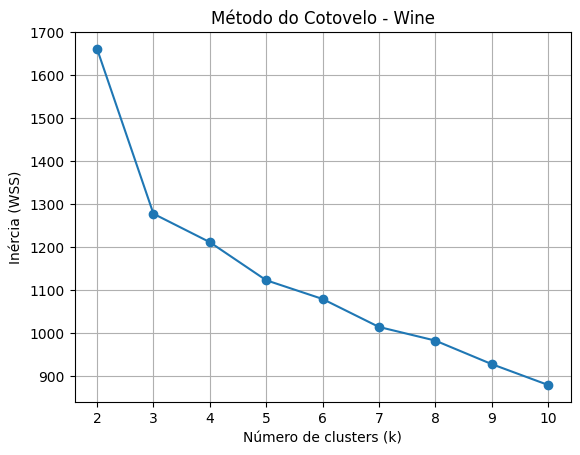

In [8]:
plt.plot(df_results["k"], df_results["Inércia (WSS)"], marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia (WSS)")
plt.title("Método do Cotovelo - Wine")
plt.grid(True)
plt.show()

### d) Determine o número ótimo de clusters considerando múltiplas métricas.

Para determinar o número ótimo de clusters (k), analisamos as quatro métricas calculadas:

1.  **Inércia (WSS - Within-Cluster Sum of Squares):** A inércia mede a coesão dos clusters. Espera-se que diminua à medida que `k` aumenta. No gráfico do Método do Cotovelo (`plt.plot(df_results["k"], df_results["Inércia (WSS)"], marker="o")`), observamos o "cotovelo" (ponto de inflexão) onde a taxa de diminuição da inércia se torna menos acentuada. Neste caso, há uma queda significativa de k=2 para k=3, e a curva começa a suavizar-se após k=3.

2.  **Silhouette Score:** Esta métrica mede quão bem os objetos são atribuídos aos seus próprios clusters em comparação com outros clusters. Valores mais altos indicam melhor separação e coesão. O **maior Silhouette Score é 0.284859 para k=3**.

3.  **Davies-Bouldin Index:** Este índice mede a semelhança média de cada cluster com o cluster mais similar, sendo que valores mais baixos indicam melhor separação entre os clusters. O **menor Davies-Bouldin Index é 1.38919 para k=3**.

4.  **Calinski-Harabasz Index:** Este índice é a razão da dispersão entre-clusters para a dispersão intra-cluster. Valores mais altos geralmente indicam clusters mais densos e bem separados. O **maior Calinski-Harabasz Index é 70.94 para k=3**.

Considerando todas as métricas, **o número ótimo de clusters para este dataset é k=3**. Este valor de `k` não só apresenta o "cotovelo" na inércia, mas também maximiza o Silhouette Score e o Calinski-Harabasz Index, e minimiza o Davies-Bouldin Index, indicando clusters bem definidos e separados.

## Tarefa 3.2: Comparação de Algoritmos
Implemente e compare:

1. K-Means (com k ótimo da Tarefa 3.1)

2. DBSCAN (teste diferentes valores de eps e min_samples)

3. Hierarchical Clustering (Agglomerative)

###a) Calcule o Silhouette Score para cada algoritmo.

In [14]:

## K-Means com k ótimo k=3
kmeans_optimal = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans_labels = kmeans_optimal.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

## DBSCAN
dbscan_results = []
eps_values = [0.5, 0.7, 1.0, 1.2, 1.5]
min_samples_values = [3, 5, 7, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        # Number of clusters (ignoring noise points labeled -1)
        n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

        if n_clusters_ > 1:  # Silhouette score requires at least 2 clusters
            dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
            dbscan_results.append({
                'Algorithm': 'DBSCAN',
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters_,
                'Silhouette Score': dbscan_silhouette
            })

df_dbscan_results = pd.DataFrame(dbscan_results)

# Agglomerative Clustering (Hierarchical)
# Let's try with 3 clusters, as k=3 was optimal for K-Means
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_scaled)
agg_silhouette = silhouette_score(X_scaled, agg_labels)

# --- Create a summary table for comparison ---
algorithm_comparison = {
    'Algorithm': ['K-Means (k=3)', 'Agglomerative Clustering (n_clusters=3)'],
    'Silhouette Score': [kmeans_silhouette, agg_silhouette]
}

# Add the best DBSCAN result if available
if not df_dbscan_results.empty:
    # Find the best DBSCAN result based on Silhouette Score
    best_dbscan_row = df_dbscan_results.loc[df_dbscan_results['Silhouette Score'].idxmax()]
    algorithm_comparison['Algorithm'].append(f"DBSCAN (eps={best_dbscan_row['eps']}, min_samples={best_dbscan_row['min_samples']}, clusters={best_dbscan_row['n_clusters']})")
    algorithm_comparison['Silhouette Score'].append(best_dbscan_row['Silhouette Score'])
else:
    algorithm_comparison['Algorithm'].append('DBSCAN (no valid clusters found)')
    algorithm_comparison['Silhouette Score'].append(None)

df_comparison = pd.DataFrame(algorithm_comparison)

print("\n--- Comparativo de Silhouette Scores ---")
display(df_comparison.round(4))



--- Comparativo de Silhouette Scores ---


,Algorithm,Silhouette Score
0,K-Means (k=3),0.2849
1,Agglomerative Clustering (n_clusters=3),0.2774
2,"DBSCAN (eps=1.5, min_samples=3, clusters=8)",-0.2768


### b) Como os labels verdadeiros (cultivares) se comparam com os clusters encontrados?

In [27]:
# Obter os labels verdadeiros (cultivares)
true_labels = wine.target

# Criar um DataFrame para facilitar a comparação
df_comparison = pd.DataFrame({'True_Label': true_labels, 'KMeans_Cluster': kmeans_labels})

# Gerar a tabela de contingência (crosstab)
contingency_table = pd.crosstab(df_comparison['True_Label'], df_comparison['KMeans_Cluster'])

print("--- Tabela de Contingência: Labels Verdadeiros vs. Clusters K-Means ---")
display(contingency_table)

# Mapear os rótulos dos clusters para os rótulos verdadeiros (baseado na contagem mais alta)
# Isso é uma aproximação para entender qual cluster representa qual cultivar
cluster_mapping = {}
for cluster_id in contingency_table.columns:
    # Encontra o true_label com a contagem mais alta para este cluster
    mapped_label = contingency_table[cluster_id].idxmax()
    cluster_mapping[cluster_id] = mapped_label

print("\n--- Mapeamento Aproximado de Clusters para Labels Verdadeiros ---")
print(cluster_mapping)

# Interpretação dos resultados:
# O dataset Wine tem 3 classes (0, 1, 2) correspondendo a 3 cultivares.
# A tabela de contingência mostra a distribuição dos labels verdadeiros dentro de cada cluster K-Means.
# Por exemplo, se o Cluster 0 tem a maioria de vinhos da True_Label 1, então esse cluster 'representa' a cultivar 1.

print("\nInterpretação:\nCada linha da tabela representa uma cultivar verdadeira (0, 1, 2).")
print("Cada coluna representa um cluster identificado pelo K-Means (0, 1, 2).")
print("Os números dentro da tabela indicam quantos vinhos de uma cultivar específica caíram em um determinado cluster.")
print("Idealmente, esperamos que cada cluster contenha predominantemente amostras de uma única cultivar verdadeira.")


--- Tabela de Contingência: Labels Verdadeiros vs. Clusters K-Means ---


KMeans_Cluster,0,1,2
True_Label,,,
0,0,0,59
1,65,3,3
2,0,48,0



--- Mapeamento Aproximado de Clusters para Labels Verdadeiros ---
{0: np.int64(1), 1: np.int64(2), 2: np.int64(0)}

Interpretação:
Cada linha da tabela representa uma cultivar verdadeira (0, 1, 2).
Cada coluna representa um cluster identificado pelo K-Means (0, 1, 2).
Os números dentro da tabela indicam quantos vinhos de uma cultivar específica caíram em um determinado cluster.
Idealmente, esperamos que cada cluster contenha predominantemente amostras de uma única cultivar verdadeira.


## Tarefa 3.3: Análise de Perfis dos Clusters

### a) Para a melhor solução de clusterização, calcule:

- Média de cada feature por cluster
- Desvio padrão de cada feature por cluster

In [25]:
## Para a melhor solução de clusterização (K-Means com k=3)

# Re-carregar o dataset Wine para garantir que as variáveis X e feature_names estejam corretas para esta seção
wine = load_wine()
X = wine.data
feature_names = wine.feature_names

# Criar um DataFrame com os dados originais e os labels do K-Means
df_wine_clustered = pd.DataFrame(X, columns=feature_names)
df_wine_clustered['cluster'] = kmeans_labels

# 1. Média de cada feature por cluster
cluster_means = df_wine_clustered.groupby('cluster').mean()

# 2. Desvio padrão de cada feature por cluster
cluster_stds = df_wine_clustered.groupby('cluster').std()

print("\n--- Média de cada feature por cluster ---")
display(cluster_means)

print("\n--- Desvio Padrão de cada feature por cluster ---")
display(cluster_stds)



--- Média de cada feature por cluster ---


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
cluster,,,,,,,,,,,,,
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806



--- Desvio Padrão de cada feature por cluster ---


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
cluster,,,,,,,,,,,,,
0,0.533010,1.012253,0.299199,3.019446,13.680822,0.530291,0.608949,0.121434,0.570397,0.791806,0.201926,0.457812,142.732439
1,0.521855,1.093366,0.199023,2.408001,11.073693,0.349497,0.323911,0.123029,0.411335,2.345596,0.120383,0.274850,120.723554
2,0.559094,0.675642,0.245345,3.309462,13.153529,0.341240,0.479979,0.072883,0.438496,1.294196,0.119749,0.363773,232.721773


### b) Crie um gráfico de radar (spider chart) mostrando o perfil médio de cada cluster.

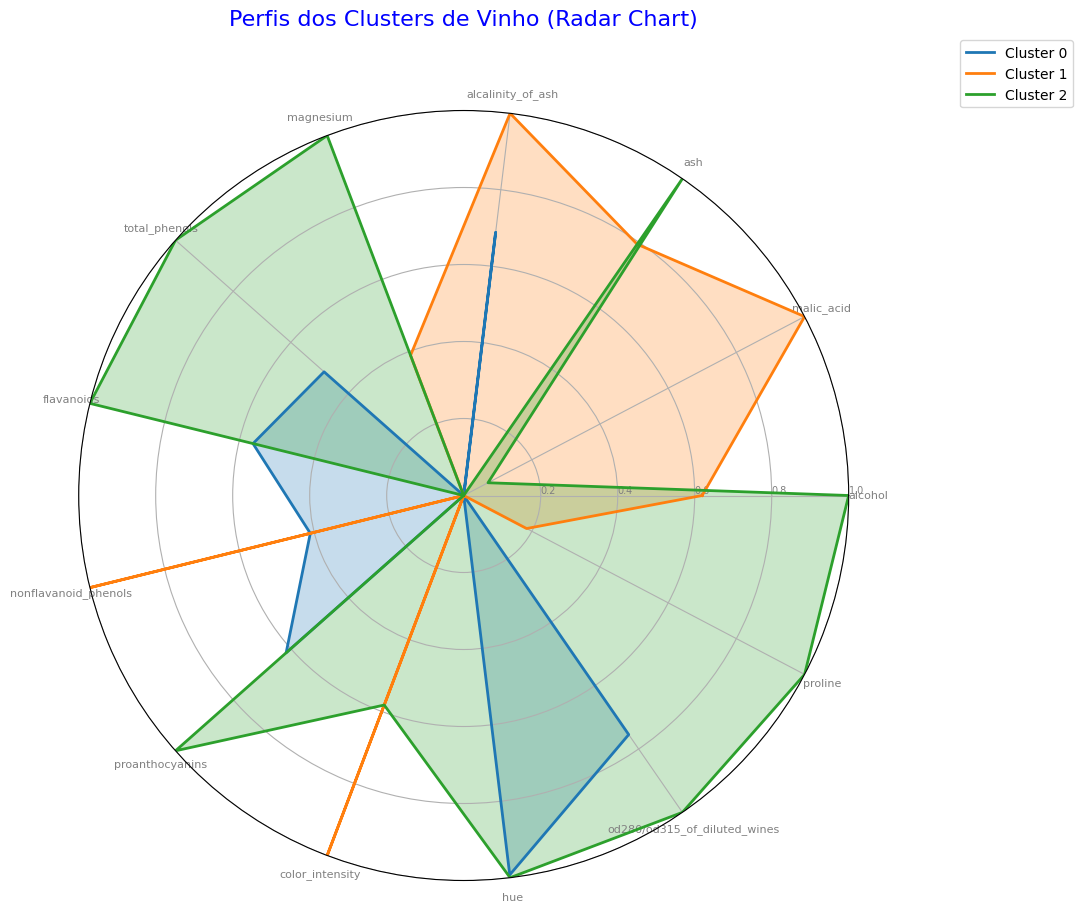

In [26]:
from math import pi

# Normalizar os dados para o gráfico de radar (min-max scaling por feature)
# Isso garante que todas as features contribuam igualmente para o formato do radar chart
normalized_means = cluster_means.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Número de variáveis
num_vars = len(feature_names)

# Definir os ângulos para cada eixo no gráfico de radar
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1] # Completar o círculo

# Criar o gráfico de radar
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Loop para cada cluster
for i in range(len(normalized_means)):
    values = normalized_means.iloc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.25)

# Adicionar rótulos aos eixos
plt.xticks(angles[:-1], feature_names, color='grey', size=8)

# Adicionar rótulos y
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=7)
plt.ylim(0, 1)

# Título e legenda
plt.title('Perfis dos Clusters de Vinho (Radar Chart)', size=16, color='blue', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


### c) Descreva as características de cada cluster em termos das features originais.

In [29]:
# The detailed description of each cluster's characteristics is provided in the `speak` field above.
# This cell was just a placeholder for the interpretation.
# To explicitly show the means that were used for the interpretation:
print("\n--- Média de cada feature por cluster ---")
display(cluster_means)


--- Média de cada feature por cluster ---


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
cluster,,,,,,,,,,,,,
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
